In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [3]:
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss,classification_report

In [5]:
### Split Dataset into Train and Text
from sklearn.model_selection import train_test_split
# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
#!pip install scikit-multilearn

In [7]:
# Multi Label Pkgs
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

In [8]:
# Load Dataset
df = pd.read_csv("https://raw.githubusercontent.com/Jcharis/Python-Machine-Learning/master/Multi_Label_Text_Classification_with_Skmultilearn/data/so_dataset_2_tags.csv")

In [9]:
df.head()

,title,tags,mysql,python,php
0,Flask-SQLAlchemy - When are the tables/databas...,"['python', 'mysql']",1,1.0,0.0
1,Combining two PHP variables for MySQL query,"['php', 'mysql']",1,0.0,1.0
2,'Counting' the number of records that match a ...,"['php', 'mysql']",1,0.0,1.0
3,Insert new row in a table and auto id number. ...,"['php', 'mysql']",1,0.0,1.0
4,Create Multiple MySQL tables using PHP,"['php', 'mysql']",1,0.0,1.0


In [10]:
df.loc[0].title

'Flask-SQLAlchemy - When are the tables/databases created and destroyed?'

In [11]:
df.dtypes

title      object
tags       object
mysql       int64
python    float64
php       float64
dtype: object

In [12]:
# Convert to Float
df['mysql'] = df['mysql'].astype(float)

In [13]:
df.dtypes

title      object
tags       object
mysql     float64
python    float64
php       float64
dtype: object

<Axes: xlabel='mysql', ylabel='count'>

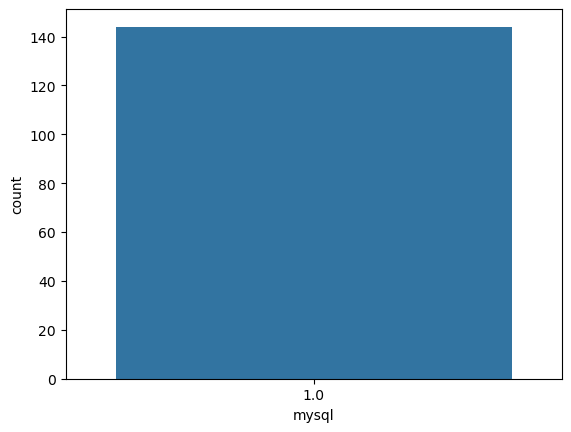

In [14]:
# Value Count 
sns.countplot(data=df, x='mysql')

In [15]:
df['mysql'].value_counts()

1.0    144
Name: mysql, dtype: int64

<Axes: xlabel='python', ylabel='count'>

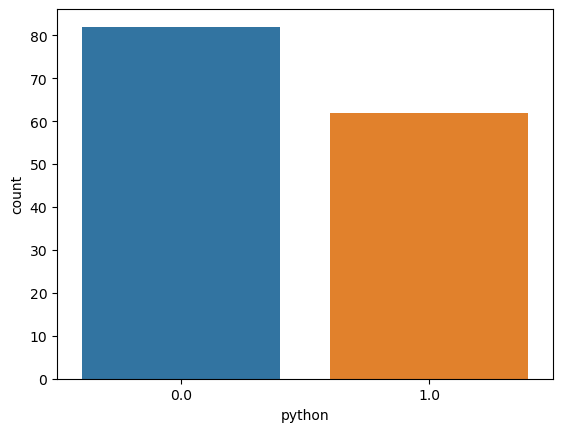

In [16]:
# Value Count 
sns.countplot(data=df, x='python')

<Axes: xlabel='php', ylabel='count'>

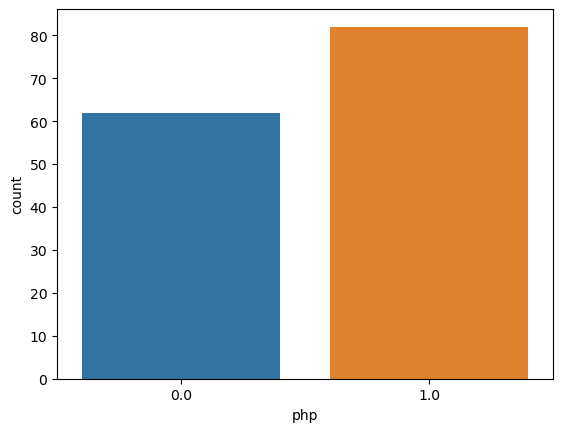

In [17]:
# Value Count 
sns.countplot(data=df, x='php')

In [18]:
df['php'].value_counts()

1.0    82
0.0    62
Name: php, dtype: int64

<Axes: >

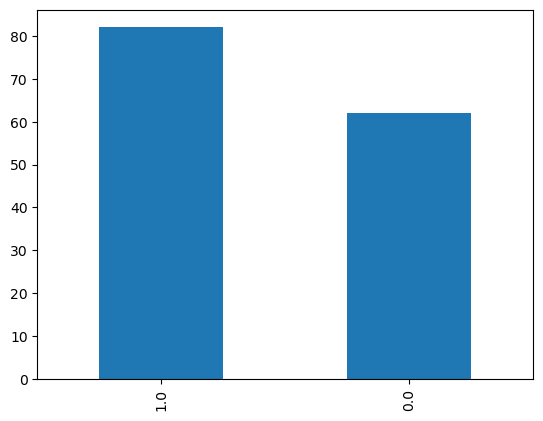

In [19]:
df['php'].value_counts().plot(kind='bar')

**Text Preprocessing**


neattext : remove_stopwords

pip install neattext

In [20]:
!pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 4.2 MB/s eta 0:00:00


In [21]:
import neattext as nt
import neattext.functions as nfx

In [22]:
df['title']

0      Flask-SQLAlchemy - When are the tables/databas...
1            Combining two PHP variables for MySQL query
2      'Counting' the number of records that match a ...
3      Insert new row in a table and auto id number. ...
4                 Create Multiple MySQL tables using PHP
                             ...                        
139    Executing "SELECT ... WHERE ... IN ..." using ...
140                           SQLAlchemy reconnect to db
141        mysql Count Distinct and get result using php
142    How to store the result of a radio button with...
143           Use SQL count result in IF statement - PHP
Name: title, Length: 144, dtype: object

In [23]:
# Explore For Noise
df['title'].apply(lambda x:nt.TextFrame(x).noise_scan())

0      {'text_noise': 11.267605633802818, 'text_lengt...
1      {'text_noise': 4.651162790697675, 'text_length...
2      {'text_noise': 9.90990990990991, 'text_length'...
3      {'text_noise': 8.47457627118644, 'text_length'...
4      {'text_noise': 2.631578947368421, 'text_length...
                             ...                        
139    {'text_noise': 26.41509433962264, 'text_length...
140    {'text_noise': 3.8461538461538463, 'text_lengt...
141    {'text_noise': 6.666666666666667, 'text_length...
142    {'text_noise': 13.636363636363635, 'text_lengt...
143    {'text_noise': 7.142857142857142, 'text_length...
Name: title, Length: 144, dtype: object

In [24]:
# Explore For Noise
df['title'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())

0                                [when, are, the, and]
1                                           [two, for]
2                    [the, of, that, a, and, the, and]
3                                    [in, a, and, and]
4                                              [using]
                            ...                       
139                                 [where, in, using]
140                                               [to]
141                                  [and, get, using]
142    [how, to, the, of, a, with, a, back, into, the]
143                                           [in, if]
Name: title, Length: 144, dtype: object

In [25]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [26]:
# Explore For Noise
df['title'].apply(nfx.remove_stopwords)

0      Flask-SQLAlchemy - tables/databases created de...
1                    Combining PHP variables MySQL query
2      'Counting' number records match certain criter...
3         Insert new row table auto id number. Php MySQL
4                       Create Multiple MySQL tables PHP
                             ...                        
139               Executing "SELECT ... ... ..." MySQLdb
140                              SQLAlchemy reconnect db
141                      mysql Count Distinct result php
142    store result radio button database value, data...
143                 Use SQL count result statement - PHP
Name: title, Length: 144, dtype: object

In [27]:
corpus = df['title'].apply(nfx.remove_stopwords)
corpus

0      Flask-SQLAlchemy - tables/databases created de...
1                    Combining PHP variables MySQL query
2      'Counting' number records match certain criter...
3         Insert new row table auto id number. Php MySQL
4                       Create Multiple MySQL tables PHP
                             ...                        
139               Executing "SELECT ... ... ..." MySQLdb
140                              SQLAlchemy reconnect db
141                      mysql Count Distinct result php
142    store result radio button database value, data...
143                 Use SQL count result statement - PHP
Name: title, Length: 144, dtype: object

**Feature Engineering**

Build features from our text

TFIDF,countvectorizer,bow

In [28]:
tfidf = TfidfVectorizer()
tfidf

TfidfVectorizer()

In [29]:
# Build Features
Xfeatures = tfidf.fit_transform(corpus).toarray()

In [30]:
Xfeatures

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
df.head()

,title,tags,mysql,python,php
0,Flask-SQLAlchemy - When are the tables/databas...,"['python', 'mysql']",1.0,1.0,0.0
1,Combining two PHP variables for MySQL query,"['php', 'mysql']",1.0,0.0,1.0
2,'Counting' the number of records that match a ...,"['php', 'mysql']",1.0,0.0,1.0
3,Insert new row in a table and auto id number. ...,"['php', 'mysql']",1.0,0.0,1.0
4,Create Multiple MySQL tables using PHP,"['php', 'mysql']",1.0,0.0,1.0


In [32]:
y = df[['mysql', 'python', 'php']]

In [33]:
# Split Data 
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.3,random_state=42)

In [34]:
print(df['title'].shape)
print(X_train.shape)

(144,)
(100, 404)


**Building Our Model**

Estimator + Multilabel Estimator

In [35]:
### Problem Transform
import skmultilearn

In [36]:
dir(skmultilearn)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'adapt',
 'base',
 'problem_transform',
 'utils']

**Binary Relevance classficiation**

Convert Our Multi-Label Prob to Multi-Class

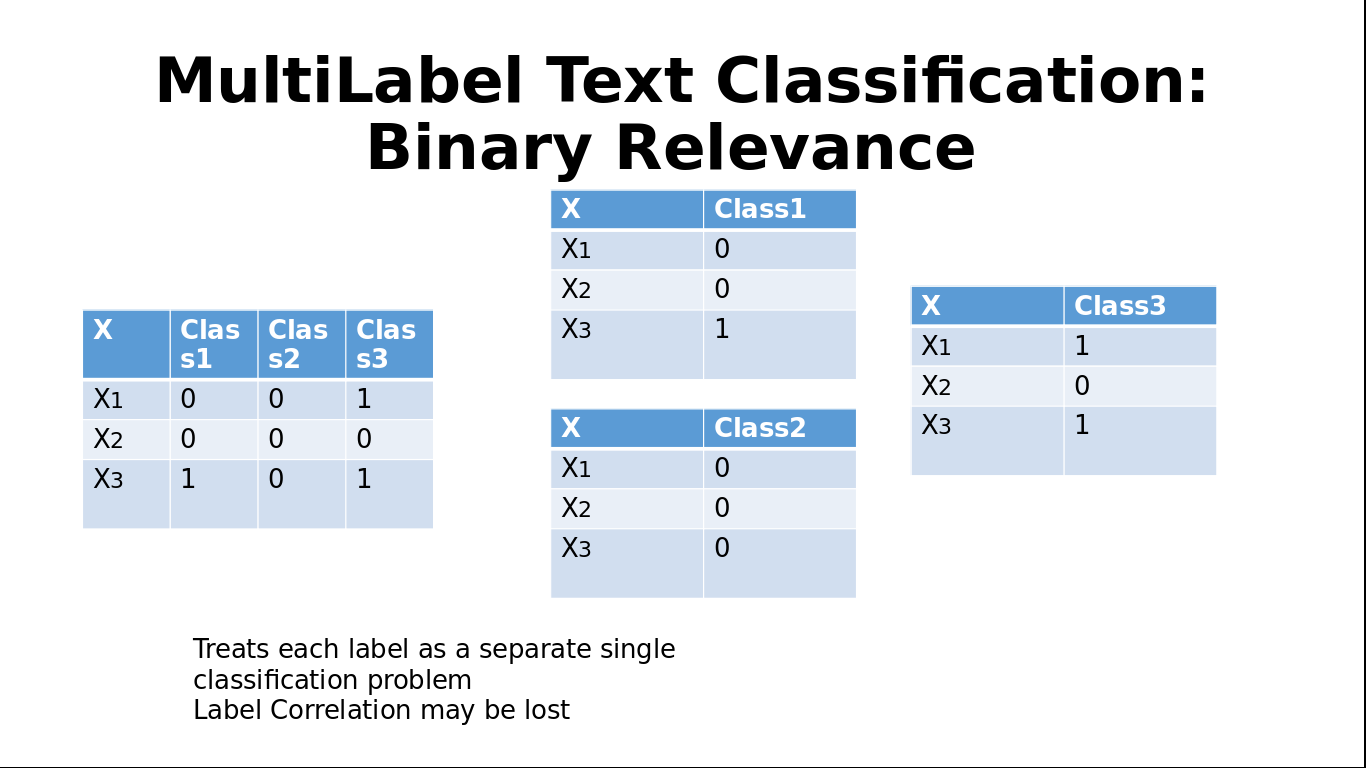

In [37]:
# Convert Our Multi-Label Prob to Multi-Class
# binary classficiation
binary_rel_clf = BinaryRelevance(MultinomialNB())

In [38]:
binary_rel_clf.fit(X_train,y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [39]:
# Predictions
br_prediction = binary_rel_clf.predict(X_test)

In [40]:
br_prediction

<44x3 sparse matrix of type '<class 'numpy.float64'>'
	with 88 stored elements in Compressed Sparse Column format>

In [41]:
# Convert to Array  To See Result
br_prediction.toarray()

array([[1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.]])

In [42]:
# Accuracy
accuracy_score(y_test,br_prediction)

0.9090909090909091

In [43]:
# Hamming Loss :Incorrect Predictions
# The Lower the result the better
hamming_loss(y_test,br_prediction)

0.06060606060606061

**Classifier Chains**

Preserve Label Correlation

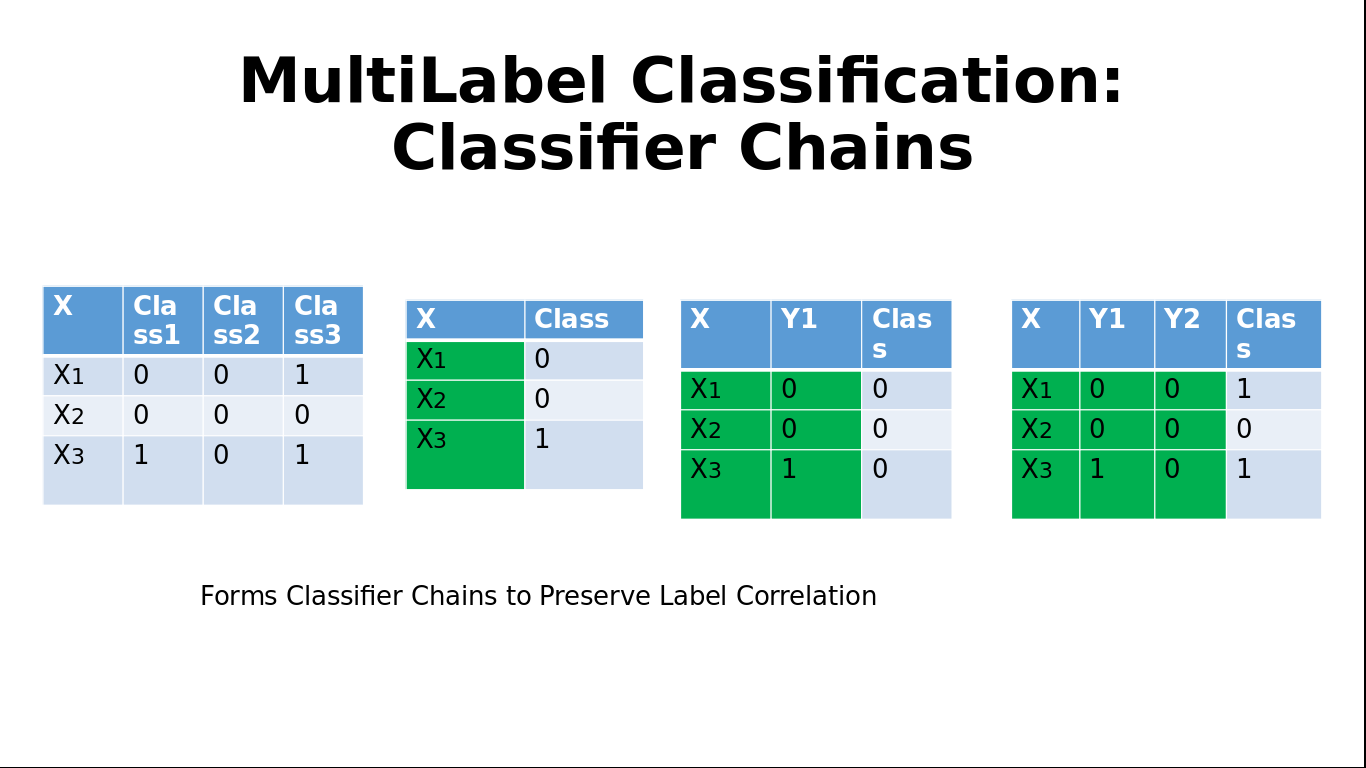

In [44]:
def build_model(model,mlb_estimator,xtrain,ytrain,xtest,ytest):
    # Create an Instance
    clf = mlb_estimator(model)
    clf.fit(xtrain,ytrain)
    # Predict
    clf_predictions = clf.predict(xtest)
    # Check For Accuracy
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)
    result = {"accuracy:":acc,"hamming_score":ham}
    return result

In [45]:
clf_chain_model = build_model(MultinomialNB(),ClassifierChain,X_train,y_train,X_test,y_test)

In [46]:
clf_chain_model

{'accuracy:': 0.8409090909090909, 'hamming_score': 0.10606060606060606}

**LabelPowerset**

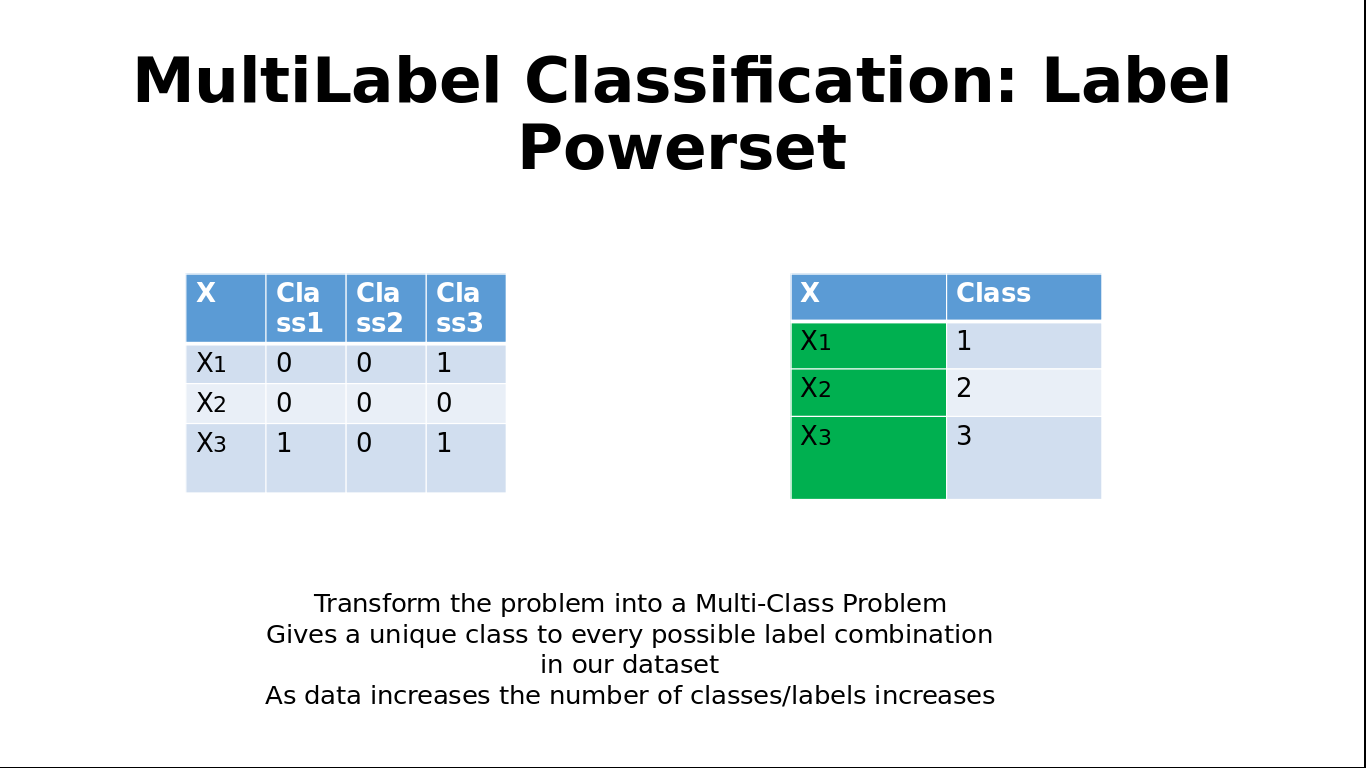

In [47]:
clf_labelP_model = build_model(MultinomialNB(),LabelPowerset,X_train,y_train,X_test,y_test)

In [48]:
clf_labelP_model

{'accuracy:': 0.9090909090909091, 'hamming_score': 0.06060606060606061}

In [49]:
### Apply On A Simple Ttitle/Question

In [50]:
ex1 = df['title'].iloc[0]

In [51]:
# Vectorized 
vec_example = tfidf.transform([ex1])

In [52]:
# Make our prediction
binary_rel_clf.predict(vec_example).toarray()

array([[1., 1., 0.]])